### Python - Calling SerpAPI's Google Jobs API from the <b> https://serpapi.com/google-jobs-api </b> Website

#### Import the required libraries

In [2]:
# Import BeautifulSoup and Requests for Web Scraping
from bs4 import BeautifulSoup
import requests

# Import JSON Module to manipulate Website's JSON Data
import json

# Import Pandas for Data Manipulation
import pandas as pd

# Import Matplotlib for Data Visualization
import matplotlib.pyplot as plt

# To use regular expressions to search use re Module
import re

# To Grab the Job Data we make use of SERP-API - https://serpapi.com/google-jobs-api
from serpapi import GoogleSearch

***

#### Define Functions for Reusability 

##### Create DataFrame and Visualize the Data based on a list of Pre-Defined Skills

In [3]:
def createDataFrame( jobJSON, preDefinedSkillsList ):
    
    # Extracting skills using regular expression
    extractedSkills = re.findall( r'\b\w+\b', jobJSON ) 

    # Filtering and counting predefined skills
    skill_counts = { skill: extractedSkills.count(skill) for skill in preDefinedSkillsList }
    print( 'Skill Counts: \n', skill_counts )

    # Creating the Dictionary for the Pandas DataFrame
    skillData = {'Skill': list(skill_counts.keys()), 'Count': list(skill_counts.values())}
    print( 'Skill Data: \n', skillData )

    # Creating a Pandas DataFrame 
    df = pd.DataFrame( skillData )

    return df

In [4]:
def visualizeDataFrame( jobs_df, jobCnt ):
    
    # Visualize the Skills DataFrame 
    plt.figure(figsize=(10, 6))
    bars = plt.bar(jobs_df['Skill'], jobs_df['Count'], align='center')
    
    plt.title( 'Skills Count for Total Jobs = ' + jobCnt )
    plt.xlabel('Skills')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.fill()
    
    # Adding value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, yval, ha='center', va='bottom', fontsize=10, color='teal')

    plt.show()

##### Create a Function to Call SERP's Google Jobs API to Grab Data for multiple Job Roles in Canada and return a Dictionary

In [5]:
def callSerpAPI( job_title, preDefinedSkills ):

    # Please put in your own SERP API Key
    params = {
      "engine": "google_jobs",
      "google_domain": "google.ca",
      "q": job_title,
      "hl": "en",
      "gl": "ca",
      "location": "Canada",
      "api_key": "YOUR_SERP_API_KEY"
    }
    
    search_serp = GoogleSearch(params)
    
    jobResults = search_serp.get_dictionary()['jobs_results']

    jobDescriptions = []
    
    # Create a Separate List of Job Descriptions from the Job-Results
    for job in jobResults:
        jobDescriptions.append( job['description'].replace('\n','') )
        jobDescriptions.append( job['job_highlights'][0]['items'][0].replace('\n','') )

    # Convert the List of Job Descriptions into String for RegExp
    jobDescriptionsString = ''.join( jobDescriptions )

    # Create a Pandas DataFrame of Job Skills
    jobs_df = createDataFrame( jobDescriptionsString, preDefinedSkills )

    # Visualize the Jobs DataFrame
    visualizeDataFrame( jobs_df, str(len(jobResults)) )

***

#### Grab API Data and then Visualize the results

##### For Data Analyst Role Grab the Job Results and then Visualize the Skills

Skill Counts: 
 {'SQL': 26, 'Python': 6, 'Tableau': 10, 'PowerBI': 4, 'Excel': 2, 'Analytics': 6, 'AWS': 2, 'SAS': 4, 'Spark': 2, 'Docker': 0, 'Ruby': 0, 'Looker': 4, 'Snowflake': 2, 'Hive': 2, 'R': 2, 'SPSS': 2, 'GCP': 2, 'Google Analytics': 0}
Skill Data: 
 {'Skill': ['SQL', 'Python', 'Tableau', 'PowerBI', 'Excel', 'Analytics', 'AWS', 'SAS', 'Spark', 'Docker', 'Ruby', 'Looker', 'Snowflake', 'Hive', 'R', 'SPSS', 'GCP', 'Google Analytics'], 'Count': [26, 6, 10, 4, 2, 6, 2, 4, 2, 0, 0, 4, 2, 2, 2, 2, 2, 0]}


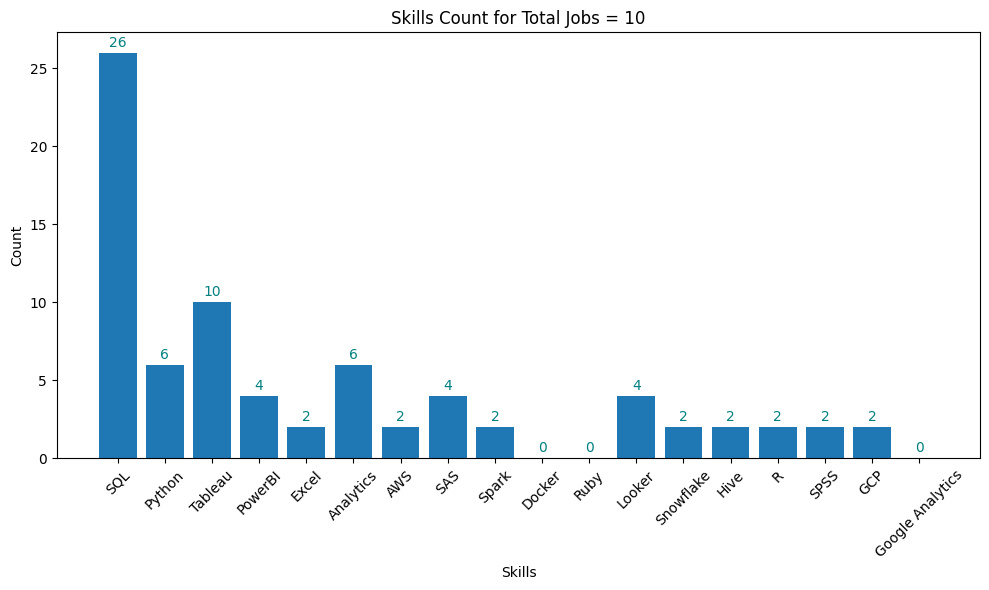

In [6]:
predefined_skills_for_DA = ['SQL', 'Python', 'Tableau', 'PowerBI', 'Excel', 'Analytics', 'AWS' ,'SAS', 'Spark', 'Docker', 'Ruby', 'Looker', 'Snowflake','Hive', 'R','SPSS', 'GCP', 'Google Analytics']

job_title = "Data Analyst"

callSerpAPI( job_title, predefined_skills_for_DA )

***

##### For Full Stack Developer Role Grab the Job Results and then Visualize the Skills

Skill Counts: 
 {'HTML': 18, 'CSS': 16, 'SQL': 6, 'Python': 2, 'JavaScript': 14, 'GraphQL': 0, 'React': 22, 'Angular': 22, 'API': 12, 'AWS': 2, 'GCP': 0, 'Azure': 2, 'PHP': 4, 'Django': 0, 'Elixir': 0, 'Ruby': 0, 'NoSQL': 0, 'Java': 14, 'Spring': 4, 'Docker': 2, 'Kafka': 0}
Skill Data: 
 {'Skill': ['HTML', 'CSS', 'SQL', 'Python', 'JavaScript', 'GraphQL', 'React', 'Angular', 'API', 'AWS', 'GCP', 'Azure', 'PHP', 'Django', 'Elixir', 'Ruby', 'NoSQL', 'Java', 'Spring', 'Docker', 'Kafka'], 'Count': [18, 16, 6, 2, 14, 0, 22, 22, 12, 2, 0, 2, 4, 0, 0, 0, 0, 14, 4, 2, 0]}


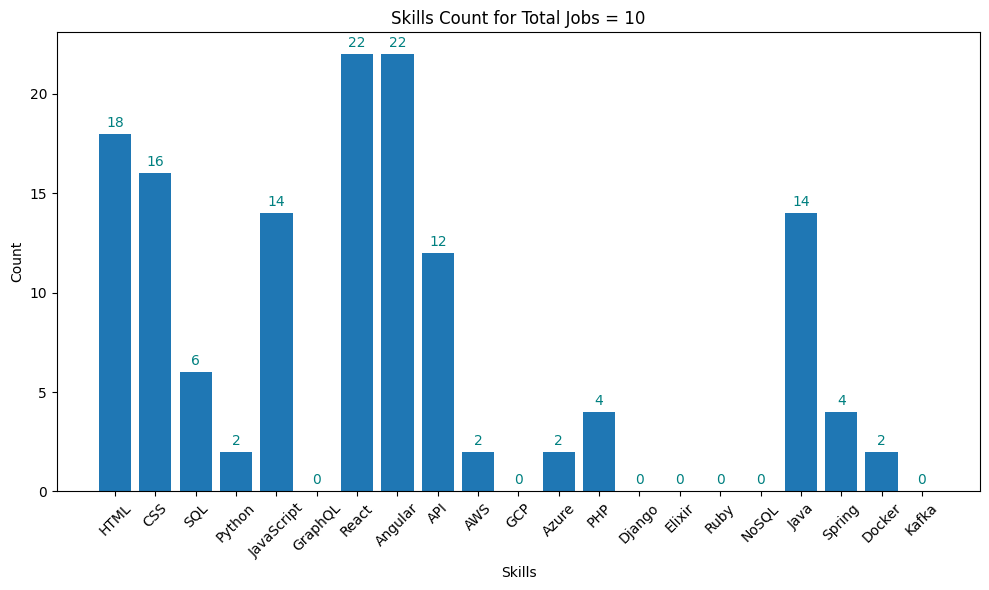

In [7]:
predefined_skills_for_Dev = ['HTML','CSS','SQL', 'Python', 'JavaScript', 'GraphQL', 'React', 'Angular', 'API', 'AWS' , 'GCP', 'Azure', 'PHP','Django', 'Elixir', 'Ruby', 'NoSQL', 'Java', 'Spring', 'Docker', 'Kafka']

job_title = "Full Stack Developer"

callSerpAPI( job_title, predefined_skills_for_Dev )

****

#### Conclusion:
- After Visualizing the Data we found out rightfully, **AWS** comes out as a clear winner amongst Cloud Technologies, irrespective of the Job Role
- We also find out that **SQL** skills are of utmost importance, irrespective of the Job Role
- **Python**, **SQL**, **Java**, **JavaScript, React and Angular** and **HTML, CSS** skills are some of the most sought-after skills    
- Creating **API's** using different languages seems like the most common Task.

---
___
*******